In [ ]:
pip install -U langgraph langgraph-supervisor langchain-tavily "langchain[openai]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Successfully uninstalled langsmith-0.3.44
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.63
    Uninstalling langc

In [ ]:
import getpass
import os


def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Please provide your {var}")


_set_if_undefined("OPENAI_API_KEY")
_set_if_undefined("TAVILY_API_KEY")

Please provide your OPENAI_API_KEY··········
Please provide your TAVILY_API_KEY··········


In [ ]:
from langgraph.prebuilt import create_react_agent

In [ ]:
def add(a: float, b: float):
    """Add two numbers."""
    return a + b

def subtract(a:float, b:float):
    """Subtract two numbers"""
    return a - b

def multiply(a: float, b: float):
    """Multiply two numbers."""
    return a * b


def divide(a: float, b: float):
    """Divide two numbers."""
    return a / b


math_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[add, subtract, multiply, divide],
    prompt=(
        "You are a math agent.\n\n"
        "INSTRUCTIONS:\n"
        "- Assist ONLY with math-related tasks\n"
        "- After you're done with your tasks, respond to the supervisor directly\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    ),
    name="math_agent",
)

In [ ]:
for chunk in math_agent.stream(
    {"messages": [{"role": "user", "content": "what's (2 + 6) x 10 / 5"}]}
):
    print(chunk)


{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fRl2eK5ko4Cidll8zZJxJcDp', 'function': {'arguments': '{"a":2,"b":6}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 170, 'total_tokens': 187, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_51e1070cf2', 'id': 'chatcmpl-Bi3P9mJyjjaJASMnGbUxnLRJXkz1t', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='math_agent', id='run--7e9613d4-5534-4017-8f23-bbde8186f129-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 6}, 'id': 'call_fRl2eK5ko4Cidll8zZJxJcDp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 170, 'output_tokens': 17, 'total_tokens': 187, 'input_t

In [ ]:
pip install tavily-python

In [ ]:
def image_generator(prompt: str):
    """Generate an image from a prompt."""

    # To install: pip install tavily-python
    from tavily import TavilyClient
    client = TavilyClient("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")
    response = client.search(
      query="image of a tiger",
      search_depth="advanced",
      max_results=4,
     include_images=True
    )
    images = response.get("images", [])
    if images:
        return images[0]
    else:
        return "No image found for this prompt."
image_generator_agent = create_react_agent(
        model="openai:gpt-4.1",
        tools=[image_generator],
        prompt=(
            "You are an image generator agent.\n\n"
            "INSTRUCTIONS:\n"
            "- Assist ONLY with image generation-related tasks\n"
            "- After you're done with your tasks, respond to the supervisor directly\n"
            "- Respond ONLY with the results of your work, do NOT include ANY other text."
        ),
        name="image_generator_agent",
)

In [ ]:
for chunk in image_generator_agent.stream(
    {"messages": [{"role": "user", "content": "Generate the image of tiger"}]}
):
    print(chunk)


{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_VyE9EJf3z0MvsWxnn6vajpfH', 'function': {'arguments': '{"prompt":"tiger"}', 'name': 'image_generator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 99, 'total_tokens': 114, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b3f1157249', 'id': 'chatcmpl-Bi56f6sikCo4j6nx4IcGWFWWPDeg3', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='image_generator_agent', id='run--347eb67b-a03b-49b5-b12d-5d8f5bec333a-0', tool_calls=[{'name': 'image_generator', 'args': {'prompt': 'tiger'}, 'id': 'call_VyE9EJf3z0MvsWxnn6vajpfH', 'type': 'tool_call'}], usage_metadata={'input_tokens': 99, 'output_t

In [ ]:
from langchain_tavily import TavilySearch
web_search = TavilySearch(max_results=3)
web_search_results = web_search.invoke("what is the capital of India?")
print(web_search_results["results"][0]["content"])
search_agent = create_react_agent(
    model="openai:gpt-4.1",
    tools=[web_search],
    prompt=(
        "You are a search agent.\n\n"
        "INSTRUCTIONS:\n"
        "- Assist ONLY with search-related tasks.\n"
        "- After you're done with your tasks, respond to the supervisor directly.\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    ),
    name="search_agent",
)

Learn why New Delhi became the capital of India in 1931 after being the capital of many kingdoms in Indian history. Find out the population, area, and problems of New Delhi, the largest city in India.


In [ ]:
for chunk in search_agent.stream(
    {"messages": [{"role": "user", "content": "what is the capital of India?"}]}
):
    print(chunk)


{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_L7OvtO4W2XLfy9SoCbNTWa5v', 'function': {'arguments': '{"query":"capital of India"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 822, 'total_tokens': 840, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_51e1070cf2', 'id': 'chatcmpl-Bi3RCCnS1pPj3wyBJYc5co4QELm4r', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='search_agent', id='run--40d0d0c0-f19d-411c-a5f3-d33fa72a7e69-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'capital of India'}, 'id': 'call_L7OvtO4W2XLfy9SoCbNTWa5v', 'type': 'tool_call'}], usage_metadata={'input_tokens': 822, 

In [ ]:
from langgraph_supervisor import create_supervisor
from langchain.chat_models import init_chat_model

supervisor = create_supervisor(
    model=init_chat_model("openai:gpt-4.1"),
    agents=[search_agent, math_agent, image_generator_agent],
    prompt=(
        "You are a supervisor managing three agents:\n"
        "- a search agent. Assign search-related tasks to this agent\n"
        "- a math agent. Assign math-related tasks to this agent\n"
        "- an image generator agent. Assign image generation-related tasks to this agent\n"
        "INSTRUCTIONS:\n"
        "Assign work to one agent at a time, do not call agents in parallel.\n"
        "Do not do any work yourself."
    ),
    add_handoff_back_messages=True,
    output_mode="full_history",
).compile()

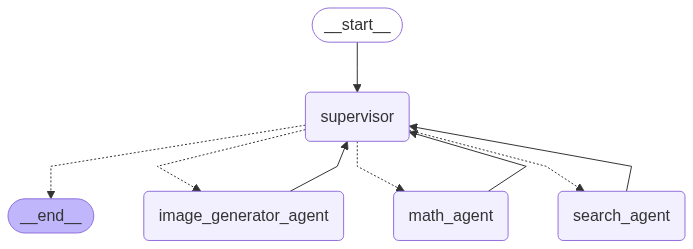

In [ ]:
from IPython.display import display, Image

display(Image(supervisor.get_graph().draw_mermaid_png()))

In [ ]:
def pretty_print_messages(chunk, last_message=False):
    """Prints messages in a clean format."""
    messages = chunk.get("supervisor", {}).get("messages", []) if last_message else chunk.get("messages", [])
    for message in messages:
        print(f"{message.role}: {message.content}")



In [ ]:
def pretty_print_messages(chunk, last_message=False):
    if last_message:
        messages = chunk.get("supervisor", {}).get("messages", [])
    else:
        messages = chunk.get("messages", [])

    for message in messages:
        print(f"{message.role}: {message.content}")


In [ ]:
for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "Generate a Tiger image. Calculate (5-2)*6. Capital of Tamil Nadu",
            }
        ]
    },
):
    print(chunk)

final_message_history = chunk["supervisor"]["messages"]


{'supervisor': {'messages': [HumanMessage(content='Generate a Tiger image. Calculate (5-2)*6. Capital of Tamil Nadu', additional_kwargs={}, response_metadata={}, id='84e3abeb-39b2-442b-bcbf-87b13266e48e'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_WAGCRItwnHXFsx2oYVwaFi0l', 'function': {'arguments': '{"query":"Tiger image"}', 'name': 'transfer_to_image_generator_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 174, 'total_tokens': 192, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_51e1070cf2', 'id': 'chatcmpl-Bi57DecMqmifBIsOPM3AlaU2ThAdj', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', id='run--104a8cb1-d11f-4b5f-954

In [ ]:
for message in final_message_history:
    message.pretty_print()

================================ Human Message =================================

Generate a Tiger image. Calculate (5-2)*6. Capital of Tamil Nadu
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_image_generator_agent (call_WAGCRItwnHXFsx2oYVwaFi0l)
 Call ID: call_WAGCRItwnHXFsx2oYVwaFi0l
  Args:
    query: Tiger image
================================= Tool Message =================================
Name: transfer_to_image_generator_agent

Successfully transferred to image_generator_agent
================================== Ai Message ==================================
Name: image_generator_agent
Tool Calls:
  image_generator (call_5EoZyBk8b2VVkm7fS34TmGkb)
 Call ID: call_5EoZyBk8b2VVkm7fS34TmGkb
  Args:
    prompt: Tiger in a jungle
================================= Tool Message =================================
Name: image_generator

https://cdn.pixabay.com/photo/2013/07/19/00/18/tiger-165189_1280.jpg
==========